In [1]:
import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crude = pd.read_csv('crude.csv')

In [3]:
crude.head(20)

,Year,Month,CrudePrice,Production,CrudeExport
0,2006,1,63.85,2.59,2.14
1,2006,2,61.33,2.47,2.02
2,2006,3,65.00,2.25,1.80
3,2006,4,72.09,2.32,1.87
4,2006,5,71.18,2.28,1.83
5,2006,6,69.32,2.41,1.96
6,2006,7,75.13,2.39,1.94
7,2006,8,75.15,2.40,1.95
8,2006,9,62.97,2.40,1.95
9,2006,10,59.49,2.38,1.93


In [4]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         183 non-null    int64  
 1   Month        183 non-null    int64  
 2   CrudePrice   183 non-null    float64
 3   Production   183 non-null    float64
 4   CrudeExport  183 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.3 KB


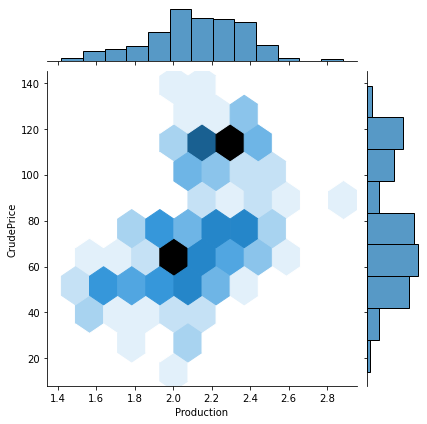

In [5]:
sns.jointplot(x='Production', y='CrudePrice', data=crude, kind='hex')

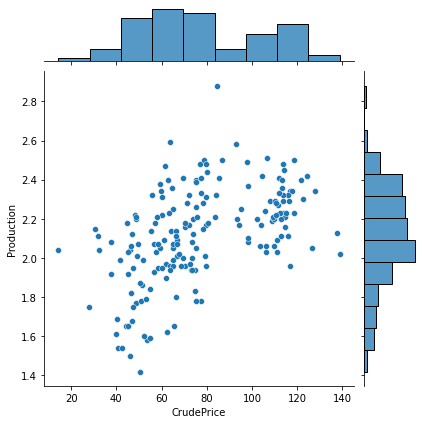

In [6]:
sns.jointplot(x='CrudePrice', y='Production', data=crude)

In [7]:
crude["CrudePrice"].sum()

14070.149999999998

In [8]:
crude.mean()

Year           2013.131148
Month             6.426230
CrudePrice       76.886066
Production        2.116120
CrudeExport       1.666120
dtype: float64

In [9]:
crude['Production'].sum()

387.25

In [10]:
crude["CrudeExport"].sum()

304.9

<AxesSubplot:xlabel='Production', ylabel='CrudePrice'>

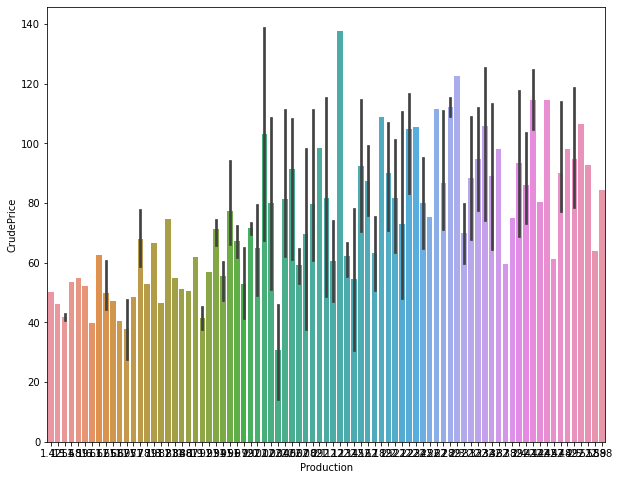

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='Production', y='CrudePrice', data=crude)

<AxesSubplot:xlabel='CrudePrice', ylabel='Production'>

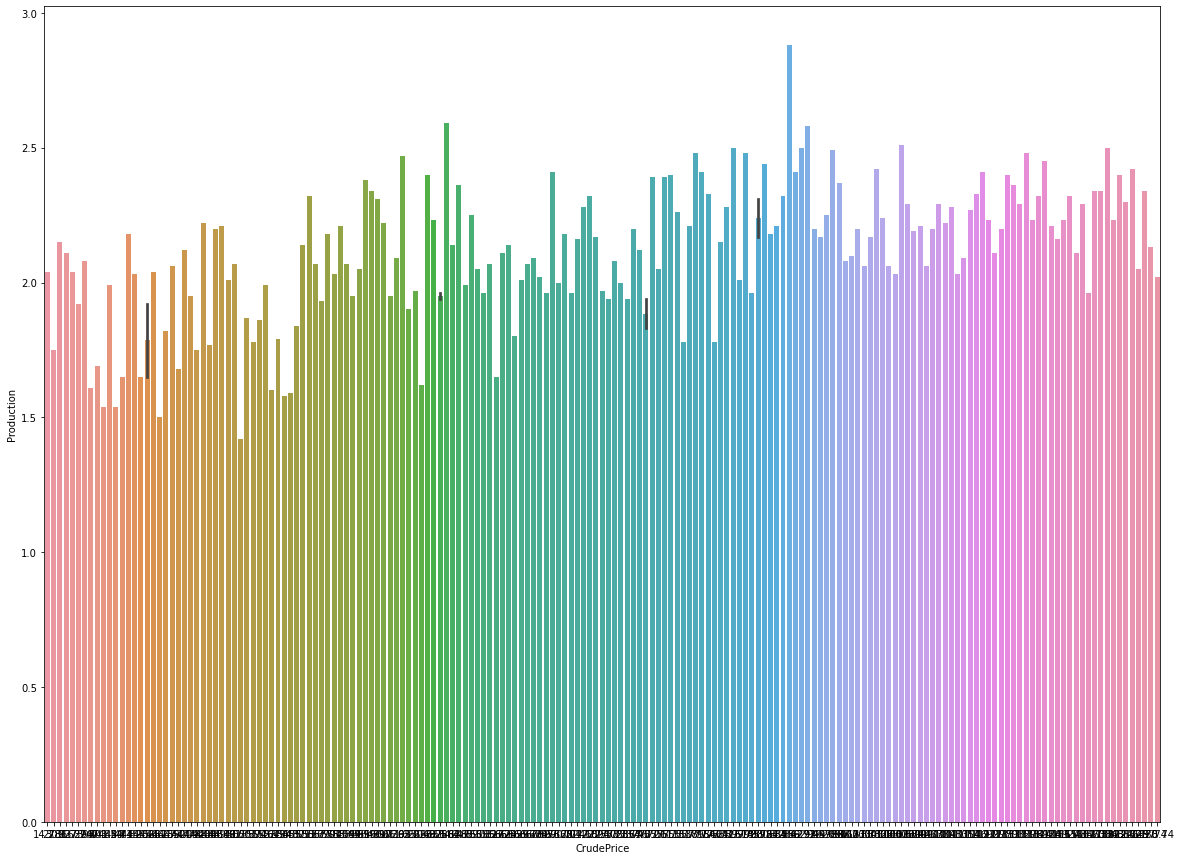

In [12]:
plt.figure(figsize=(20,15))
sns.barplot(x='CrudePrice',y='Production',data=crude)

<Figure size 1440x720 with 0 Axes>

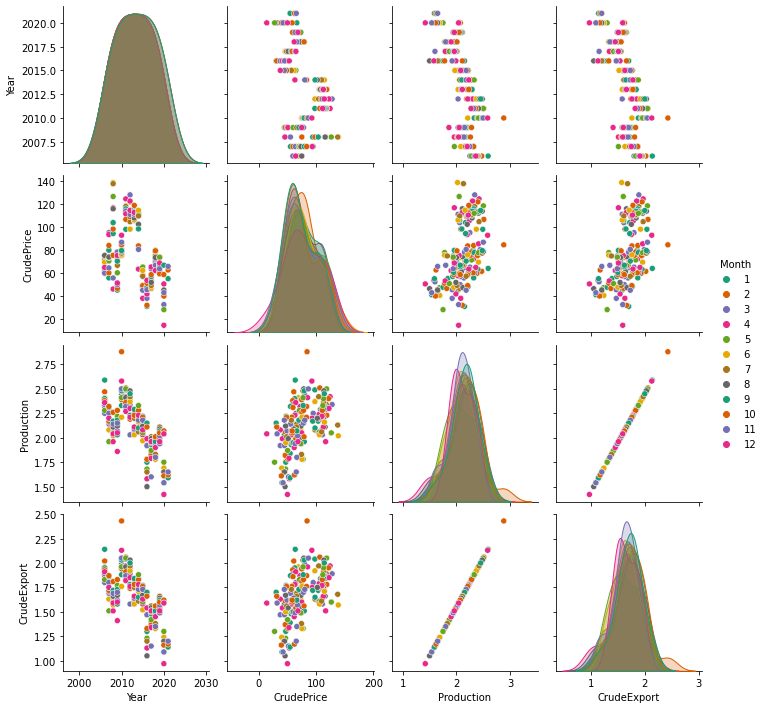

In [13]:
plt.figure(figsize=(20,10))
sns.pairplot(crude, hue='Month', palette='Dark2')

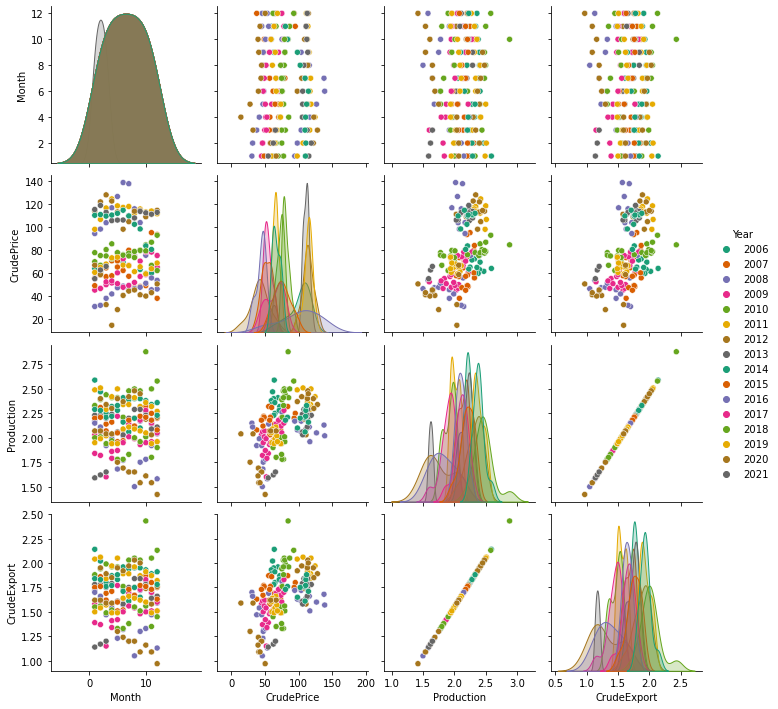

In [14]:
sns.pairplot(crude,hue='Year', palette='Dark2')

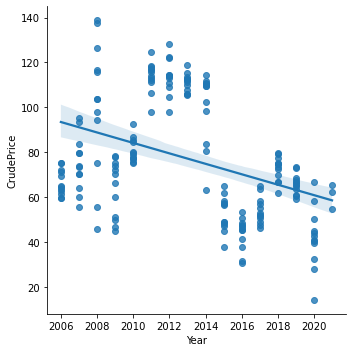

In [15]:
sns.lmplot(x='Year', y='CrudePrice', data=crude)

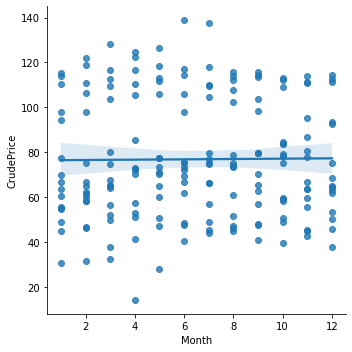

In [16]:
sns.lmplot(x="Month", y="CrudePrice", data=crude)

In [17]:
y = crude['Production']
X = crude[["CrudePrice", "CrudeExport"]]


In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [3.57061725e-18 1.00000000e+00]


In [23]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

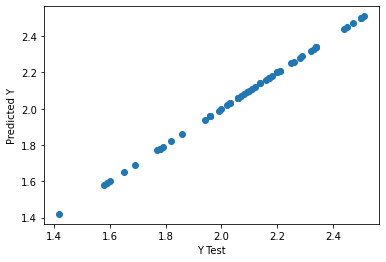

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.5341263613002163e-16
MSE: 5.737170219789176e-32
RMSE: 2.3952390736185767e-16


C:\Users\HP\anaconda3me\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Production', ylabel='Density'>

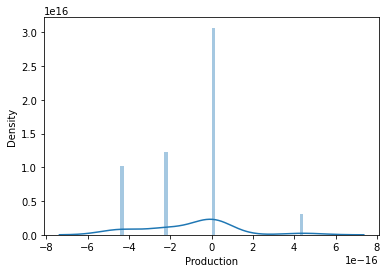

In [26]:
sns.distplot((y_test-predictions), bins= 50)

In [27]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
CrudePrice,3.570617e-18
CrudeExport,1.000000e+00
